# Lecture-05-2 Fresnel Equation
* author : Wei-Kai Lee
* Data : 2019/12/13

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def SnellLaw(theta_i, ni, nt=1.0):
    # theta_i : incident angle
    # ni : the refractive index of the incident material
    # nt : the refractive index of the transmissive material
    theta_i = np.array( theta_i, dtype=np.complex_ )
    
    # theta_t : refractive angle
    theta_t = np.arcsin( (ni/nt) * np.sin(theta_i) )
    return theta_t
def cal_r_tau_TE(theta_i, ni, nt=1.0):
    # theta_i : incident angle
    # ni : the refractive index of the incident material
    # nt : the refractive index of the transmissive material
    
    # theta_t : refractive angle
    theta_t = SnellLaw( theta_i, ni, nt)
    # r_TE : reflection coefficients defined on the electric field
    # tau_TE : transmission coefficients defined on the electric field
    r_TE    = ( ni*np.cos(theta_i)-nt*np.cos(theta_t) ) / ( ni*np.cos(theta_i)+nt*np.cos(theta_t) )
    tau_TE  = ( 2*ni*np.cos(theta_i) ) / ( ni*np.cos(theta_i)+nt*np.cos(theta_t) )
    return r_TE, tau_TE
def cal_r_tau_TM(theta_i, ni, nt=1.0):
    # theta_i : incident angle
    # ni : the refractive index of the incident material
    # nt : the refractive index of the transmissive material
    
    # theta_t : refractive angle
    theta_t = SnellLaw( theta_i, ni, nt)
    # r_TM : reflection coefficients defined on the electric field
    # tau_TM : transmission coefficients defined on the electric field
    r_TM = ( nt*np.cos(theta_i)-ni*np.cos(theta_t) ) / ( ni*np.cos(theta_t)+nt*np.cos(theta_i) )
    tau_TM = ( 2*ni*np.cos(theta_i) ) / ( ni*np.cos(theta_t)+nt*np.cos(theta_i) )
    return r_TM, tau_TM

In [3]:
def CriticalAngle( ni, nt):
    # ni : the refractive index of the incident material
    # nt : the refractive index of the transmissive material
    return np.arcsin( nt/ni ) if nt<=ni else np.pi/2
def BrewsterAngle(ni, nt=1.0):
    # ni : the refractive index of the incident material
    # nt : the refractive index of the transmissive material
    theta_B = np.arctan( nt/ni )
    return theta_B
def cal_kz(k, kx, ky):
    # n : refractive index
    # ko : wave number in vacuum
    # kx : wave number along x-axis
    # ky : wave number along y-axis
    kz = np.sqrt( k**2 - kx**2 - ky**2, dtype=np.complex_ )
    return kz

### Now we are going to show you how to prove the Fresnel equation by rigorous electromagnetic wave equations.

### what we have learned in Lecture 1 (Plane Wave)

In [4]:
def wave_equation(A0, x, y, z, t=0.0, w=1.0, kx=1.0, ky=1.0, kz=1.0):
    # A0 : the complex amplitude of the wave
    # x, y, z : positions
    # t : time
    # w : angular frequency
    # kx, ky, kz : wave number components
    return A0 * np.exp( 1j * ( kx*x + ky*y + kz*z - w*t) )
def cal_k(kx, ky, kz):
    # kx, ky, kz : wave number components
    return np.sqrt(kx**2 + ky**2 + kz**2)
def cal_normalize_direction(kx, ky, kz):
    # kx, ky, kz : wave number components
    k = cal_k(kx, ky, kz)
    return kx/k, ky/k, kz/k

### what we have learned in Lecture 3 (Boundary Conditions)

In [5]:
def cal_epsilon_r_from_n(n=1.0):
    # n : refractive index
    return n**2
def cal_D_from_E(E, epsilon=1.0):
    # E : electric field
    # epsilon : permittivity (=epsilon0 * epsilonr)
    return E * epsilon
def cal_Dz2(Dz1, sigma_s = 0.0):
    # Dz1 : z component of the displacement vector field in material 1
    # sigma_s : surface charge density
    return Dz1 + sigma_s
def cal_Bz2(Bz1):
    # Bz1 : z component of the magnetic field in material 1
    return Bz1

In [6]:
def cal_B_from_H(H, mu=1.0):
    # H : magnetic intensity field
    # mu : permeability (= mu0 * mur)
    return H * mu
def cal_Ex2(Ex1):
    # Ex1 : x component of the electric field in material 1
    return Ex1
def cal_Ey2(Ey1):
    # Ey1 : y component of the electric field in material 1
    return Ey1
def cal_Hx2(Hx1, Jsy = 0.0):
    # Hx1 : x component of the magnetic intensity field in material 1
    # Jsy : y component of the surface current density 
    return Hx1 + Jsy
def cal_Hy2(Hy1, Jsx = 0.0):
    # Hy1 : y component of the magnetic intensity field in material 1
    # Jsx : x component of the surface current density 
    return Hy1 - Jsx

### what we have learned in Lecture 4 (TE mode and TM mode)

In [7]:
# TE set
def cal_Hx_from_Ey(Ey, kz, w, mu0 = 1.0, mur=1.0):
    # Ey : y component of the electic field
    # kz : z component of the wave vector
    # w : angular frequency
    # mu0 : permeability in vacuum
    # mur : relative permeability
    return -(kz/w/mu0/mur) * Ey
def cal_Hz_from_Ey(Ey, kx, w, mu0 = 1.0, mur=1.0):
    # Ey : t component of the electric field
    # kx : x component of the wave vector
    # w : angular frequency
    # mu0 : permeability in vacuum
    # mur : relative permeability
    return (kx/w/mu0/mur) * Ey
# TM set
def cal_Ex_from_Hy(Hy, kz, w, e0=1.0, er=1.0):
    # Hy : y component of the magnetic intensity field
    # kz : z component of the wave vector
    # w : angular frequency
    # e0 : permittivity in vacuum
    # er : relative permittivity
    return (kz/w/e0/er)*Hy
def cal_Ez_from_Hy(Hy, kx, w, e0=1.0, er=1.0):
    # Hy : y component of the magnetic intensity field
    # kx : x component of the wave vector
    # w : angular frequency
    # e0 : permittivity in vacuum
    # er : relative permittivity
    return -(kx/w/e0/er)*Hy

## Incidence, Reflection and Transmission Definitions

From the experiments, as shown in **Fig. 1**, when there is an incident ray in material 1 (on xz plane, $k_y = 0$), there would be one reflected ray also in material 1 and a transmissive ray in material 2. Now we are going to calculate the reflection coeffcients, $\gamma_{TE,TM}$, between the reflected ray and the incident ray and the transmission coefficients, $\tau_{TE,TM}$, between the transmissive ray and the incident ray. 

<img src="Lecture-5-Material/Fig-1.jpg" width="700">
$$Fig. 1. $$


========================================================================================================================
#### Supporting 1
The field toward +z could be represented:

<font size="4">$$F^+(x,y,z) = F_+exp(i(k_xx+k_yy+k_zz)) - (S1)$$</font>

and the field toward -z could be represented:

<font size="4">$$F^-(x,y,z) = F_-exp(i(k_xx+k_yy-k_zz)) - (S2)$$</font>

where $k_z = \sqrt{k^2 - k_x^2 - k_y^2}$, which is a constant and $F_+$ and $F_-$ are also complex constants.

========================================================================================================================


Suppose the total electric field and total the magnetic field in material 1 are $E_{x,1}, E_{y,1}, E_{z,1}, H_{x,1}, H_{y,1}, H_{z,1}$ and the electric field and the magnetic field in material 2 are $E_{x,2}, E_{y,2}, E_{z,2}, H_{x,2}, H_{y,2}, H_{z,2}$. 

### TE mode incidence (**Fig. 1(a)**)
Because the incident wave (toward +z) and the reflected wave (toward -z) are both in material 1, then the total field in material 1 would be

<font size="4"> for $z<0$ </font> 
<font size="4">$$E_{y,1}(\textbf{r}) = E_{y,1}^+(\textbf{r}) + E_{y,1}^-(\textbf{r}) - (1)$$</font>
<font size="4">$$H_{x,1}(\textbf{r}) = H_{x,1}^+(\textbf{r}) + H_{x,1}^-(\textbf{r}) - (2)$$</font>
<font size="4">$$H_{z,1}(\textbf{r}) = H_{z,1}^+(\textbf{r}) + H_{z,1}^-(\textbf{r}) - (3)$$</font>

Only transmissive wave is in material 2 (toward +z).

<font size="4"> for $z>0$ </font>
<font size="4">$$E_{y,2}(\textbf{r}) = E_{y,2}^+(\textbf{r}) - (4)$$</font>
<font size="4">$$H_{x,2}(\textbf{r}) = H_{x,2}^+(\textbf{r}) - (5)$$</font>
<font size="4">$$H_{z,2}(\textbf{r}) = H_{z,2}^+(\textbf{r}) - (6)$$</font>
    
Similarly, for TM mode incidence,
 
### TM mode incidence (**Fig. 1(b)**)

<font size="4"> for $z<0$ </font>
<font size="4">$$H_{y,1}(\textbf{r}) = H_{y,1}^+(\textbf{r}) + H_{y,1}^-(\textbf{r}) - (7)$$</font>
<font size="4">$$E_{x,1}(\textbf{r}) = E_{x,1}^+(\textbf{r}) + E_{x,1}^-(\textbf{r}) - (8)$$</font>
<font size="4">$$E_{z,1}(\textbf{r}) = E_{z,1}^+(\textbf{r}) + E_{z,1}^-(\textbf{r}) - (9)$$</font>
<font size="4"> for $z>0$ </font>
<font size="4">$$H_{y,2}(\textbf{r}) = H_{y,2}^+(\textbf{r}) - (10)$$</font>
<font size="4">$$E_{x,2}(\textbf{r}) = E_{x,2}^+(\textbf{r}) - (11)$$</font>
<font size="4">$$E_{z,2}(\textbf{r}) = E_{z,2}^+(\textbf{r}) - (12)$$</font>
   

In [8]:
def cal_total_field(F_plus, F_minus=0.0):
    return F_plus + F_minus

## Match Boundary Conditions

Applied with the boundary conditions

<font size="4">$$\hat{\textbf{a}}_n\cdot(\textbf{D}_1-\textbf{D}_2) = \rho_S = 0- (13)$$</font>
<font size="4">$$\hat{\textbf{a}}_n\cdot(\textbf{B}_1-\textbf{B}_2) = 0 - (14)$$</font>
<font size="4">$$\hat{\textbf{a}}_n\times(\textbf{E}_1-\textbf{E}_2) = \textbf{0} - (15)$$</font>
<font size="4">$$\hat{\textbf{a}}_n\times(\textbf{H}_1-\textbf{H}_2) = \textbf{J}_S =  \textbf{0}- (16)$$</font>

and no charge and current would accumulate on the interface; as a result, the tangential components of $\textbf{E}$ and $\textbf{H}$ should be continuous on the interface and the normal components of $\textbf{D}$ and $\textbf{B}$ should also be continuous.

For similicity, in the following section, we only consider non-magnetic material. (i.e. $\mu_r = 1.0$)

### TE mode Incidence
<font size="4">$$E_{y,1}(z=0^-,t) = E_{y,2}(z=0^+,t) - (17)$$</font>
<font size="4">$$H_{x,1}(z=0^-,t) = H_{x,2}(z=0^+,t) - (18)$$</font>
<font size="4">$$H_{z,1}(z=0^-,t) = H_{z,2}(z=0^+,t) - (19)$$</font>

then insert **Eq. (1-6)** into **Eq. (17-19)**,

<font size="4">$$E_{y,1}^+(z=0^-,t) + E_{y,1}^-(z=0^-,t) = E_{y,2}^+(z=0^+,t) - (20)$$</font>
<font size="4">$$H_{x,1}^+(z=0^-,t) + H_{x,1}^-(z=0^-,t) = H_{x,2}^+(z=0^+,t) - (21)$$</font>
<font size="4">$$H_{z,1}^+(z=0^-,t) + H_{z,1}^-(z=0^-,t) = H_{z,2}^+(z=0^+,t) - (22)$$</font>

Insert **Eq. (S1-S2)** into **Eq. (20-22)** 

<font size="4">$$E_{y,1,+}exp(ik_{x,1}x) + E_{y,1,-}exp(ik_{x,1}x) = E_{y,2,+}exp(ik_{x,2}x) - (23)$$</font>
<font size="4">$$H_{x,1,+}exp(ik_{x,1}x) + H_{x,1,-}exp(ik_{x,1}x) = H_{x,2,+}exp(ik_{x,2}x) - (24)$$</font>
<font size="4">$$H_{z,1,+}exp(ik_{x,1}x) + H_{z,1,-}exp(ik_{x,1}x) = H_{z,2,+}exp(ik_{x,2}x) - (25)$$</font>

Because **Eq. (23-25)** hold for all x, then it is obvious that $k_{x,1}$ and $k_{x,2}$ should be the same, which is the same as what we have learned in **Lecture 2 (Snell's Law)**. We showed that because the wave front should be continuous on the interface, the tangential components of the wave vector should be the same and thus $k_{x,1} = k_{x,2}$. As a result, the Snell's Law must be followed, indicating that when you calculate the EM wave properties by Maxwell's equations, you do not need to consider Snell's Law because the Snell's Law is already contained in Maxwell's equations. 

And in **Lecture 4**, we have derived the relation between $H_x$, $H_z$, and $E_y$, 

<font size="4">$$H_x = -\frac{k_z}{\omega\mu_0\mu_r}E_y - (26)$$</font>
<font size="4">$$H_z = +\frac{k_x}{\omega\mu_0\mu_r}E_y - (27)$$</font>
<font size="4">$$E_y(\textbf{r},t) = E_{y,0}exp(i (\textbf{k}\cdot\textbf{r}-\omega t)) - (28)$$</font>

**Eq. (23-25)** would become:

<font size="4">$$E_{y,1,+} + E_{y,1,-} = E_{y,2,+} - (29)$$</font>
<font size="4">$$-\frac{k_{z,1}}{\omega\mu_0}E_{y,1,+} + -\frac{-k_{z,1}}{\omega\mu_0}E_{y,1,-} = -\frac{k_{z,2}}{\omega\mu_0}E_{y,2,+} - (30)$$</font>
<font size="4">$$+\frac{k_{x,1}}{\omega\mu_0}E_{y,1,+} + \frac{k_{x,1}}{\omega\mu_0}E_{y,1,-}  = +\frac{k_{x,2}}{\omega\mu_0}E_{y,2,+} - (31)$$</font>

Interestingly, because $k_{x,1} = k_{x,2}$, then **Eq. (29)** and **Eq.(31)** are the same and only one equation should be considered. (As discussed in **Lecture 1**, there exists a relation between the charge density and the current density.)

### Reflection Coefficients and Transmission Coefficients of TE mode

With the definition of the reflection coefficient, $\gamma$, and the transmission coefficient, $\tau$,

<font size="4">$$\gamma_{s,E} = \frac{E_{y,1,-}}{E_{y,1,+}} - (32)$$</font>
<font size="4">$$\tau_{s,E} = \frac{E_{y,2,+}}{E_{y,1,+}} - (33)$$</font>

Then, **Eq. (29-31)** can be further elaborated as:

<font size="4">$$ 1 + \gamma_{s,E} = \tau_{s,E} - (34)$$</font>
<font size="4">$$ k_{z,1}( 1 - \gamma_{s,E}) = k_{z,2}\tau_{s,E} - (35)$$</font>

then,

<font size="4">$$ \tau_{s,E} - \gamma_{s,E} = 1 - (36)$$</font>
<font size="4">$$ k_{z,2}\tau_{s,E} + k_{z,1}\gamma_{s,E} = k_{z,1} - (37)$$</font>

In order to solve the equations, **Eq. (36-37)** can be represented by the matrix representation:

<font size="4">$$\left( \begin{array}{cc} 1 & -1 \\ k_{z,2} & k_{z,1} \end{array} \right)\left( \begin{array}{c} \tau_{s,E} \\ \gamma_{s,E} \end{array} \right) = \left( \begin{array}{c} 1 \\ k_{z,1} \end{array} \right) - (38)$$</font>

Then,

<font size="4">$$\left( \begin{array}{c} \tau_{s,E} \\ \gamma_{s,E} \end{array} \right) = \frac{1}{k_{z,1}+k_{z,2}} \left( \begin{array}{cc} k_{z,1} & 1 \\ -k_{z,2} & 1 \end{array} \right)\left( \begin{array}{c} 1 \\ k_{z,1} \end{array} \right) - (39)$$</font>

so

<font size="4">$$\left( \begin{array}{c} \tau_{s,E} \\ \gamma_{s,E} \end{array} \right) =  \left( \begin{array}{c} \frac{2k_{z,1}}{k_{z,1}+k_{z,2}} \\ \frac{k_{z,1}-k_{z,2}}{k_{z,1}+k_{z,2}} \end{array} \right) - (40)$$</font>

Besides, $k_z = nk_ocos\theta$, then **Eq. (40)** would become 

<font size="4">$$\left( \begin{array}{c} \tau_{s,E} \\ \gamma_{s,E} \end{array} \right) =  \left( \begin{array}{c} \frac{2n_1k_ocos\theta_1}{n_1k_ocos\theta_1+n_2k_ocos\theta_2} \\ \frac{n_1k_ocos\theta_1-n_2k_ocos\theta_2}{n_1k_ocos\theta_1+n_2k_ocos\theta_2} \end{array} \right) - (41)$$</font>

is the same as the equations in [wikipedia (Chinese)](https://zh.wikipedia.org/wiki/%E8%8F%B2%E6%B6%85%E8%80%B3%E6%96%B9%E7%A8%8B) [wikipedia (English)](https://en.wikipedia.org/wiki/Fresnel_equations).

Then up to now, we have solved the reflection coefficients and the transmission coefficient of TE mode.


In [9]:
def solve_r_tau_s_E(kz1, kz2):
    # kz1 : the z component of the wave vector in material 1
    # kz2 : the z component of the wave vector in material 2
    
    # according to Eq. (40)
    tau_s_E = 2*kz1 / (kz1 + kz2)
    r_s_E = (kz1 - kz2) / (kz1 + kz2)
    return tau_s_E, r_s_E

### TM mode Incidence
Follow the same procedure in TE mode incidence. 

<font size="4">$$H_{y,1}(z=0^-,t)=H_{y,2}(z=0^+,t) - (42)$$</font>
<font size="4">$$E_{x,1}(z=0^-,t)=E_{x,2}(z=0^+,t) - (43)$$</font>
<font size="4">$$E_{z,1}(z=0^-,t)=E_{z,2}(z=0^+,t) - (44)$$</font>

then insert **Eq. (7-12)** into **Eq. (42-44)**,

<font size="4">$$H_{y,1}^+(z=0^-,t) + H_{y,1}^-(z=0^-,t) = H_{y,2}^+(z=0^+,t) - (45)$$</font>
<font size="4">$$E_{x,1}^+(z=0^-,t) + E_{x,1}^-(z=0^-,t) = E_{x,2}^+(z=0^+,t) - (46)$$</font>
<font size="4">$$E_{z,1}^+(z=0^-,t) + E_{z,1}^-(z=0^-,t) = E_{z,2}^+(z=0^+,t) - (47)$$</font>

Insert **Eq. (S1-S2)** into **Eq. (45-47)** and $k_{x,1} = k_{x,2}$  

<font size="4">$$H_{y,1,+} + H_{y,1,-} = H_{y,2,+} - (48)$$</font>
<font size="4">$$E_{x,1,+} + E_{x,1,-} = E_{x,2,+} - (49)$$</font>
<font size="4">$$E_{z,1,+} + E_{z,1,-} = E_{z,2,+} - (50)$$</font>

In **Lecture 4**

<font size="4">$$E_x = + \frac{k_z}{\omega\epsilon_0\epsilon_r}H_y - (51)$$</font>
<font size="4">$$E_z = - \frac{k_x}{\omega\epsilon_0\epsilon_r}H_y - (52)$$</font>

With **Eq. (51-52)**, **Eq. (48-50)** would become:

<font size="4">$$H_{y,1,+} + H_{y,1,-} = H_{y,2,+} - (53)$$</font>
<font size="4">$$\frac{k_{z,1}}{\omega\epsilon_0\epsilon_{r,1}}H_{y,1,+} + \frac{-k_{z,1}}{\omega\epsilon_0\epsilon_{r,1}}H_{y,1,-} = \frac{k_{z,2}}{\omega\epsilon_0\epsilon_{r,2}}H_{y,2,+} - (54)$$</font>



Define $\gamma_{p,H} = H_{y,1,-}/H_{y,1,+}$ and $\tau_{p,H} = H_{y,2,+}/H_{y,1,+}$

<font size="4">$$ 1 + \gamma_{p,H} = \tau_{p,H} - (54)$$</font>
<font size="4">$$ \frac{k_{z,1}}{\epsilon_{r,1}}( 1 - \gamma_{p,H}) = \frac{k_{z,2}}{\epsilon_{r,2}}\tau_{p,H} - (55)$$</font>

Then the matrix representation would be:

<font size="4">$$\left( \begin{array}{cc} 1 & -1 \\ \frac{k_{z,2}}{\epsilon_{r,2}} & \frac{k_{z,1}}{\epsilon_{r,1}} \end{array} \right)\left( \begin{array}{c} \tau_{p,H} \\ \gamma_{p,H} \end{array} \right) = \left( \begin{array}{c} 1 \\ \frac{k_{z,1}}{\epsilon_{r,1}} \end{array} \right) - (56)$$</font>

Then,

<font size="4">$$\left( \begin{array}{c} \tau_{p,H} \\ \gamma_{p,H} \end{array} \right) = \frac{1}{\frac{k_{z,1}}{\epsilon_{r,1}}+\frac{k_{z,2}}{\epsilon_{r,2}}} \left( \begin{array}{cc} \frac{k_{z,1}}{\epsilon_{r,1}} & 1 \\ \frac{-k_{z,2}}{\epsilon_{r,2}} & 1 \end{array} \right)\left( \begin{array}{c} 1 \\ \frac{k_{z,1}}{\epsilon_{r,1}} \end{array} \right) - (57)$$</font>

so

<font size="4">$$\left( \begin{array}{c} \tau_{p,H} \\ \gamma_{p,H} \end{array} \right) =  \frac{1}{\frac{k_{z,1}}{\epsilon_{r,1}}+\frac{k_{z,2}}{\epsilon_{r,2}}}\left( \begin{array}{c} \frac{2k_{z,1}}{\epsilon_{r,1}} \\ \frac{k_{z,1}}{\epsilon_{r,1}}-\frac{k_{z,2}}{\epsilon_{r,2}} \end{array} \right) =  \left( \begin{array}{c} \frac{2\epsilon_{r,2}k_{z,1}}{\epsilon_{r,2}k_{z,1}+\epsilon_{r,1}k_{z,2}} \\ \frac{\epsilon_{r,2}k_{z,1}-\epsilon_{r,1}k_{z,2}}{\epsilon_{r,2}k_{z,1}+\epsilon_{r,1}k_{z,2}} \end{array} \right) - (58)$$</font>

Interestingly the reflection coefficient and the transmission coefficient in **Eq. (58)** is different from the equations in [wikipedia (Chinese)](https://zh.wikipedia.org/wiki/%E8%8F%B2%E6%B6%85%E8%80%B3%E6%96%B9%E7%A8%8B) [wikipedia (English)](https://en.wikipedia.org/wiki/Fresnel_equations) because the reflection coefficient and the transmission coefficient in wiki is defined based on the total electric field of TM mode. 

In order to compare the reuslts with wiki, the total electric field of TM mode calculated according to 

<font size="4">$$\textbf{k}\times\textbf{H}= -\omega(\epsilon_0\epsilon_r\textbf{E}) - (59)$$</font>

in **Lecture 4**. Then

<font size="4">$$\textbf{E} = \frac{1}{\omega\epsilon_0\epsilon_r} \textbf{k}\times\textbf{H} - (60)$$</font>

Then

<font size="4">$$\left( \begin{array}{c} E_x \\ E_y \\ E_z \end{array} \right) =  \frac{1}{\omega\epsilon_0\epsilon_r} \left( \begin{array}{c} k_yH_z-k_zH_y \\ k_zH_x-k_xH_z\\ k_xH_y-k_yH_x \end{array} \right) =  \frac{1}{\omega\epsilon_0\epsilon_r} \left( \begin{array}{c} -k_zH_y \\ 0\\ k_xH_y \end{array} \right) - (61)$$</font>

and 

<font size="4">$$E = \sqrt{E_x^2+E_y^2+E_z^2} = \frac{k}{\omega\epsilon_0\epsilon_r}H_y = \frac{n\omega\sqrt{\epsilon_0\mu_0}}{\omega\epsilon_0n^2}H_y = \frac{1}{n}\sqrt{\frac{\mu_0}{\epsilon_o}}H_y - (62)$$</font>

As a result,

<font size="4">$$\gamma_{p,E} = \frac{E_{1,-}}{E_{1,+}} = \frac{H_{y,1,-}}{H_{y,1,+}} = \gamma_{p,H} = \frac{\epsilon_{r,2}k_{z,1}-\epsilon_{r,1}k_{z,2}}{\epsilon_{r,2}k_{z,1}+\epsilon_{r,1}k_{z,2}} - (63)$$</font>
<font size="4">$$\tau_{p,E} = \frac{E_{2,+}}{E_{1,+}} = \frac{n_1H_{y,2,+}}{n_2H_{y,1,+}} = \frac{n_1}{n_2}\tau_{p,H} = \frac{n_1}{n_2} \frac{2\epsilon_{r,2}k_{z,1}}{\epsilon_{r,2}k_{z,1}+\epsilon_{r,1}k_{z,2}} - (64)$$</font>

With  $k_z = nk_ocos\theta$, **Eq. (63-64)** is the same as in [wikipedia (Chinese)](https://zh.wikipedia.org/wiki/%E8%8F%B2%E6%B6%85%E8%80%B3%E6%96%B9%E7%A8%8B) [wikipedia (English)](https://en.wikipedia.org/wiki/Fresnel_equations). 

In [10]:
def solve_r_tau_p_H(kz1, kz2, n1, n2):
    # kz1 : the z component of the wave vector in material 1
    # kz2 : the z component of the wave vector in material 2
    # n1 : the reflective index of material 1
    # n2 : the reflective index of material 2
    
    er1, er2 = n1**2, n2**2
    # according to Eq. (58)
    tau_p_H = (2*er2*kz1) / (er2*kz1 + er1*kz2)
    r_p_H = (er2*kz1 - er1*kz2) / (er2*kz1 + er1*kz2)
    return tau_p_H, r_p_H
def solve_r_tau_p_E(kz1, kz2, n1, n2):
    # kz1 : the z component of the wave vector in material 1
    # kz2 : the z component of the wave vector in material 2
    # n1 : the reflective index of material 1
    # n2 : the reflective index of material 2
    
    er1, er2 = n1**2, n2**2
    # according to Eq. (64)
    tau_p_E = (n1/n2) * (2*er2*kz1) / (er2*kz1 + er1*kz2)
    r_p_E = (er2*kz1 - er1*kz2) / (er2*kz1 + er1*kz2)
    return tau_p_E, r_p_E

## Example

In [11]:
n1, n2 = 1.5, 1.0
theta1 = np.linspace( 0, np.pi/2, 100)
wavelength = 520
e0, mu0 = 1.0, 1.0

theta2 = SnellLaw(theta1, n1, n2)
c = 1/np.sqrt(e0*mu0)
ko = 2*np.pi/wavelength
w = c * ko
k1, k2 = n1*ko, n2*ko

kx1 = k1 * np.sin(theta1)
kz1 = k1 * np.cos(theta1)
ky1 = np.zeros( kx1.shape )

kx2 = k2 * np.sin(theta2)
kz2 = k2 * np.cos(theta2)
ky2 = np.zeros( kx2.shape )

In [12]:
# calculation from Fresnel Equations (wiki)
r_TE_FE, tau_TE_FE = cal_r_tau_TE(theta1, n1, n2)
r_TM_FE, tau_TM_FE = cal_r_tau_TM(theta1, n1, n2)
# calculation from the matrix
tau_s_E, r_s_E = solve_r_tau_s_E(kz1, kz2)
tau_p_E, r_p_E = solve_r_tau_p_E(kz1, kz2, n1, n2)
tau_p_H, r_p_H = solve_r_tau_p_H(kz1, kz2, n1, n2)

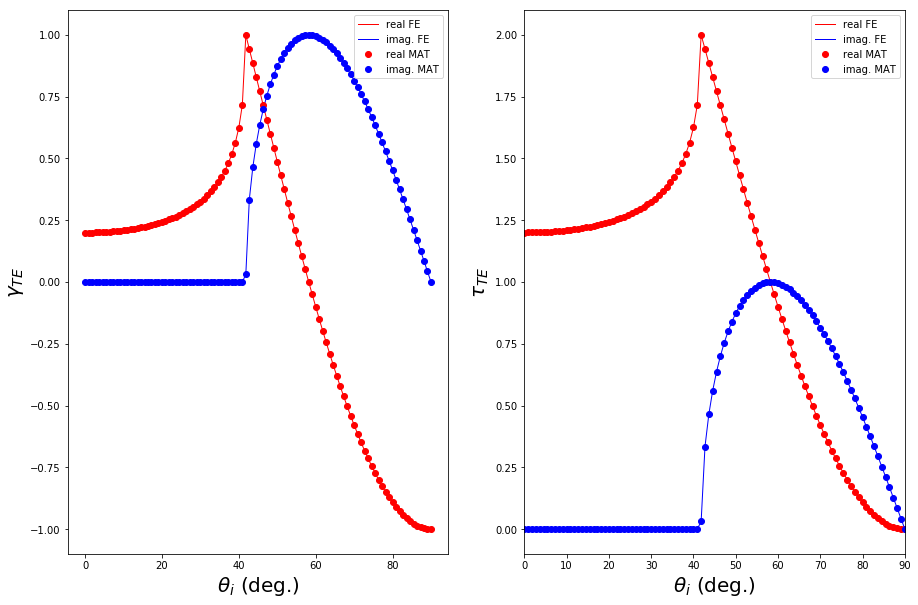

In [14]:
## plot TE data
fig, axes = plt.subplots(1,2)
plt.rcParams['figure.figsize'] = [15, 10]

axes[0].plot( theta1*180/np.pi, np.real( r_TE_FE ), 'r-', linewidth=1.0)
axes[0].plot( theta1*180/np.pi, np.imag( r_TE_FE ), 'b-', linewidth=1.0)
axes[0].plot( theta1*180/np.pi, np.real( r_s_E ), 'ro', linewidth=2.0)
axes[0].plot( theta1*180/np.pi, np.imag( r_s_E ), 'bo', linewidth=2.0)
axes[0].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[0].set_ylabel(r'$\gamma_{TE}$', fontsize=20)
axes[0].legend(['real FE', 'imag. FE', 'real MAT', 'imag. MAT'], fontsize=10)
plt.xlim( 0, 90);

axes[1].plot( theta1*180/np.pi, np.real( tau_TE_FE ), 'r-', linewidth=1.0)
axes[1].plot( theta1*180/np.pi, np.imag( tau_TE_FE ), 'b-', linewidth=1.0)
axes[1].plot( theta1*180/np.pi, np.real( tau_s_E ), 'ro', linewidth=2.0)
axes[1].plot( theta1*180/np.pi, np.imag( tau_s_E ), 'bo', linewidth=2.0)
axes[1].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[1].set_ylabel(r'$\tau_{TE}$', fontsize=20)
axes[1].legend(['real FE', 'imag. FE', 'real MAT', 'imag. MAT'], fontsize=10)
plt.xlim( 0, 90);

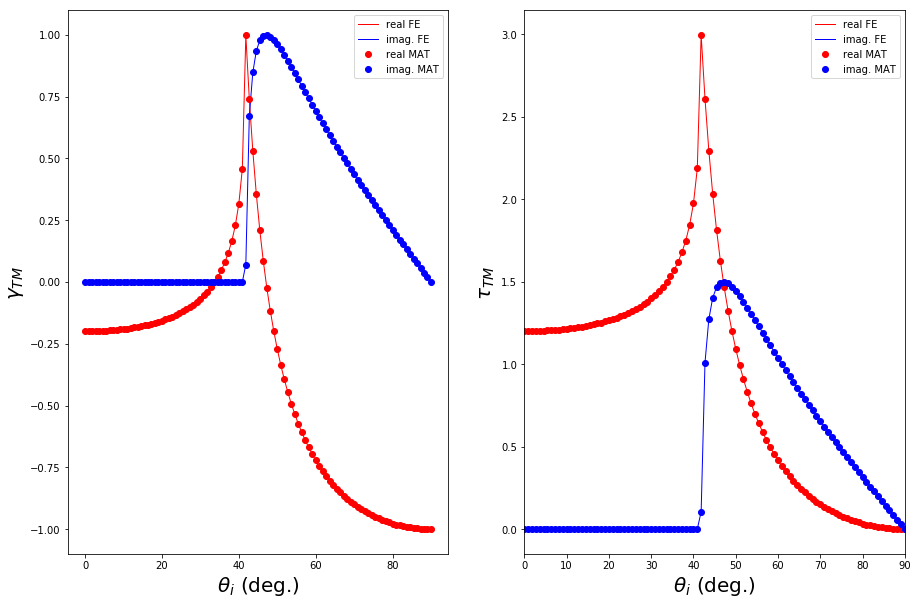

In [15]:
## plot TE data
fig, axes = plt.subplots(1,2)
plt.rcParams['figure.figsize'] = [15, 10]

axes[0].plot( theta1*180/np.pi, np.real( r_TM_FE ), 'r-', linewidth=1.0)
axes[0].plot( theta1*180/np.pi, np.imag( r_TM_FE ), 'b-', linewidth=1.0)
axes[0].plot( theta1*180/np.pi, np.real( r_p_E ), 'ro', linewidth=2.0)
axes[0].plot( theta1*180/np.pi, np.imag( r_p_E ), 'bo', linewidth=2.0)
axes[0].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[0].set_ylabel(r'$\gamma_{TM}$', fontsize=20)
axes[0].legend(['real FE', 'imag. FE', 'real MAT', 'imag. MAT'], fontsize=10)
plt.xlim( 0, 90);

axes[1].plot( theta1*180/np.pi, np.real( tau_TM_FE ), 'r-', linewidth=1.0)
axes[1].plot( theta1*180/np.pi, np.imag( tau_TM_FE ), 'b-', linewidth=1.0)
axes[1].plot( theta1*180/np.pi, np.real( tau_p_E ), 'ro', linewidth=2.0)
axes[1].plot( theta1*180/np.pi, np.imag( tau_p_E ), 'bo', linewidth=2.0)
axes[1].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[1].set_ylabel(r'$\tau_{TM}$', fontsize=20)
axes[1].legend(['real FE', 'imag. FE', 'real MAT', 'imag. MAT'], fontsize=10)
plt.xlim( 0, 90);

The above figures show that the equations in [wikipedia (Chinese)](https://zh.wikipedia.org/wiki/%E8%8F%B2%E6%B6%85%E8%80%B3%E6%96%B9%E7%A8%8B) [wikipedia (English)](https://en.wikipedia.org/wiki/Fresnel_equations) is the same what we have derived. However, in our derivation, we can calculate all the field quantities.

In [16]:
# TE mode
Ey1p = np.zeros( theta1.shape, dtype=np.complex ) # incidence
Hx1p = cal_Hx_from_Ey(Ey1p, kz1, w, mu0 = 1.0, mur=1.0)
Hz1p = cal_Hz_from_Ey(Ey1p, kx1, w, mu0 = 1.0, mur=1.0)

Ey1n = r_s_E * Ey1p
Hx1n = cal_Hx_from_Ey(Ey1n,-kz1, w, mu0 = 1.0, mur=1.0)
Hz1n = cal_Hz_from_Ey(Ey1n, kx1, w, mu0 = 1.0, mur=1.0)

Ey2p = tau_s_E * Ey1p
Hx2p = cal_Hx_from_Ey(Ey2p, kz2, w, mu0 = 1.0, mur=1.0)
Hz2p = cal_Hz_from_Ey(Ey2p, kx2, w, mu0 = 1.0, mur=1.0)

In [17]:
# check boundary
dEy = Ey1p + Ey1n - Ey2p
print( np.sum( np.abs(dEy) ) == 0.0 )

dHx = Hx1p + Hx1n - Hx2p
print( np.sum( np.abs(dHx) ) == 0.0 )

dHz = Hz1p + Hz1n - Hz2p
print( np.sum( np.abs(dHz) ) == 0.0 )

True
True
True


In [18]:
# TM mode
Hy1p = np.zeros( theta1.shape, dtype=np.complex ) # incidence
Ex1p = cal_Hx_from_Ey(Ey1p, kz1, w, mu0 = mu0, mur=1.0)
Ez1p = cal_Hz_from_Ey(Ey1p, kx1, w, mu0 = mu0, mur=1.0)

Hy1n = r_p_H * Hy1p
Ex1n = cal_Ex_from_Hy(Hy1n,-kz1, w, e0 = e0, er=n1**2)
Ez1n = cal_Ez_from_Hy(Hy1n, kx1, w, e0 = e0, er=n1**2)

Hy2p = tau_p_H * Hy1p
Ex2p = cal_Ex_from_Hy(Hy2p, kz2, w, e0 = e0, er=n2**2)
Ez2p = cal_Ez_from_Hy(Hy2p, kx2, w, e0 = e0, er=n2**2)

In [19]:
# check boundary
dHy = Hy1p + Hy1n - Hy2p
print( np.sum( np.abs(dHy) ) == 0.0 )

dEx = Ex1p + Ex1n - Ex2p
print( np.sum( np.abs(dEx) ) == 0.0 )

dEz = Ez1p + Ez1n - Ez2p
print( np.sum( np.abs(dEz) ) == 0.0 )

True
True
True


From the above calculation, we found that all the boundary conditions holds. However, in the above calculation, we suppose $k_y = 0.0$, material 1 and material 2 are non-magnetic ($\mu_r = 1.0$), and only consider 1 interface. In the following section. We'll going to introduce more powerful method, called transfer matrix method (TMM), to solve this questions.

## The results are wrong when $\theta_i > \theta_c$ and we will deal with this in Lecture 6-2.